In [ ]:
import pandas as pd

# Read data from url
automobile_data = pd.read_csv("https://archive.ics.uci.edu/static/public/10/data.csv")
automobile_data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [ ]:
#check for null values
automobile_data.isnull().sum()

,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0
length,0


In [ ]:
# drop null values
automobile_data.dropna(inplace=True)
automobile_data.isnull().sum()

,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0
length,0


# City MPG & Highway MPG

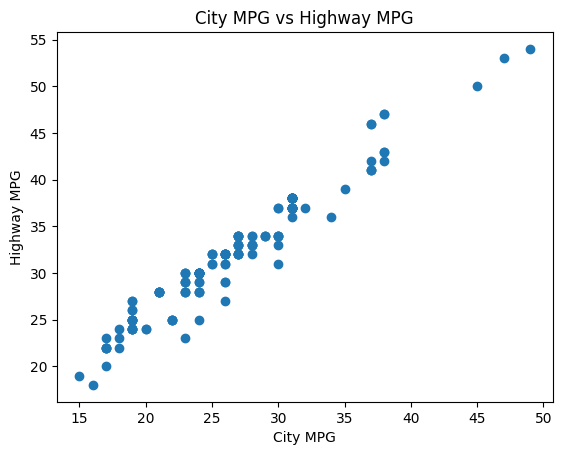

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(automobile_data['city-mpg'], automobile_data['highway-mpg'])
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('City MPG vs Highway MPG')
plt.show()



*   What : Two quantitative values(Scatterplot of Highway MPG vs City MPG)
*   How : Express values with horizontal and vertical spatial position and point marks.
*   Why : To explore the correlation between the two values.

### Findings:
*   There is a strong positive correlation between Highway MPG and City MPG




# Heatmap of Correlation Matrix for all continuous features

In [ ]:
# dataset of continuous features
continuous_features = automobile_data[['price','city-mpg', 'highway-mpg','peak-rpm','horsepower','length','width',
                       'height','compression-ratio','stroke','bore','engine-size','curb-weight','wheel-base','normalized-losses']]

continuous_features.head()

,price,city-mpg,highway-mpg,peak-rpm,horsepower,length,width,height,compression-ratio,stroke,bore,engine-size,curb-weight,wheel-base,normalized-losses
3,13950.0,24,30,5500.0,102.0,176.6,66.2,54.3,10.0,3.4,3.19,109,2337,99.8,164.0
4,17450.0,18,22,5500.0,115.0,176.6,66.4,54.3,8.0,3.4,3.19,136,2824,99.4,164.0
6,17710.0,19,25,5500.0,110.0,192.7,71.4,55.7,8.5,3.4,3.19,136,2844,105.8,158.0
8,23875.0,17,20,5500.0,140.0,192.7,71.4,55.9,8.3,3.4,3.13,131,3086,105.8,158.0
10,16430.0,23,29,5800.0,101.0,176.8,64.8,54.3,8.8,2.8,3.50,108,2395,101.2,192.0


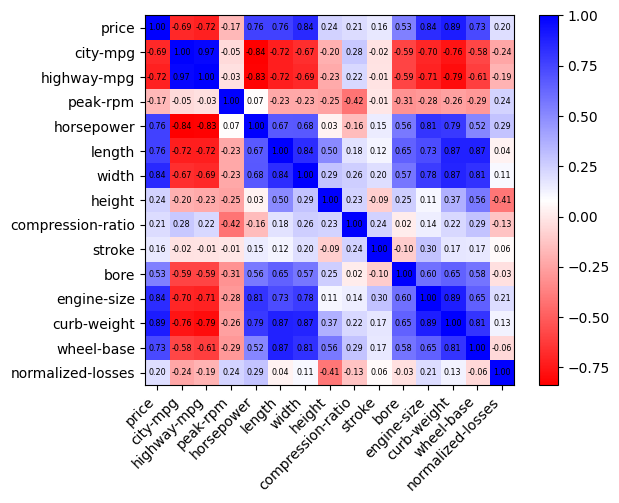

In [ ]:
matrix = continuous_features.corr()
# plotting correlation matrix
plt.imshow(matrix, cmap='bwr_r')
# adding colorbar
plt.colorbar()
# extracting variable names
variables = matrix.columns

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Loop over data dimensions and create text annotations.
for i in range(len(matrix)):
    for j in range(len(matrix)):
        plt.text(j, i, f'{matrix.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black',fontsize='xx-small')

# Display the plot
plt.show()

*   What : 15 Quantitative values
*   How : 2D matrix of correlation strength with a diverging color map.
*   Why : To explore the correlation between all continuous features in order to identify the strongest and weakest relationships.

### Findings:
*   The highest correlation, 0.97 is between city-mpg and highway-mpg while the weakest, -0.01 is between stroke and highway-mpg as well as stroke and peak-rpm.

# Box Plot of Price vs Body Style

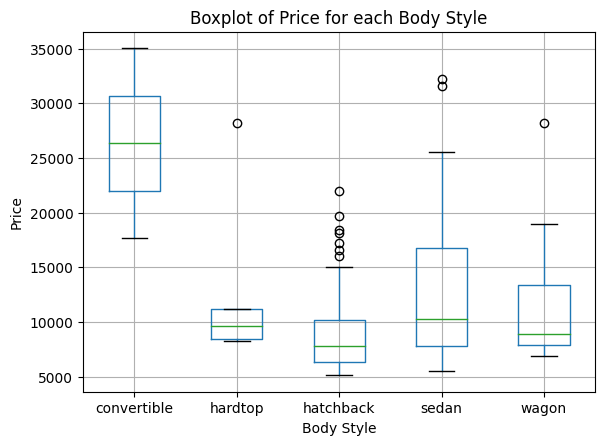

In [ ]:
# Plot side by side box plot of price vs body style
automobile_data.boxplot(column='price', by='body-style')

# Add labels and title
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.title('Boxplot of Price for each Body Style')
plt.suptitle('')

# Display the chart
plt.show()

*   What : 1 Quantitative(Price), 1 Categorical(Body-style)
*   How : 1D list alignment of glyphs(box plot), separated with horizontal spatial position per body style.
*   Why : To analyze the distribution of price within each body style category, and identify outliers.

### Findings:
*   Convertibles are the most expensive body style overall.
*   Sedans and wagons show the most variation in price, indicating that there are both low-cost and high-cost models in these categories.
*   Hatchbacks are generally the most affordable, with a smaller price range.

# Side-by-side Bar Chart of Price by Drive Wheels and Make


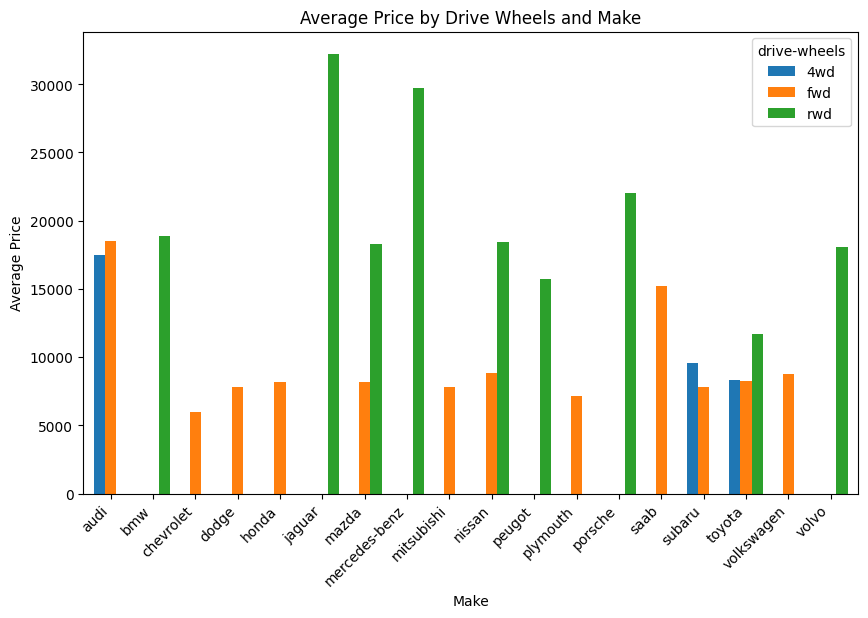

In [ ]:
# Create a grouped bar chart (side-by-side) for 'price' by 'make' and 'drive-wheels'
df = automobile_data.groupby(['make', 'drive-wheels'])['price'].mean().unstack()

# Plot the chart (grouped side-by-side bars)
df.plot(kind='bar', stacked=False, width=.8, figsize=(10, 6))

# Add labels and title
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.title('Average Price by Drive Wheels and Make')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

*   What : Multidimensional table: 1 Quantitative value (Price), 2 Categorical Key Values(Drive wheels and Make)
*   How : Each car make is shown on the x-axis, and the price on the y-axis. The bars are color-coded to represent different drive-wheel types. Each bar indicates the price distribution for each make based on its drive-wheel configuration.
*   Why : To compare how different drive-wheel types affect the price across various car makes, look up values and find trends.

### Findings:
*   Brands like Jaguar, Mercedes-Benz, and Porsche tend to have more expensive rwd vehicles, while brands like Toyota and Subaru offer a variety of fwd and 4wd models.
*   4wd vehicles are generally more common in brands like Toyota and Subaru but are less common in other brands.

# Count Plot of Fuel Type

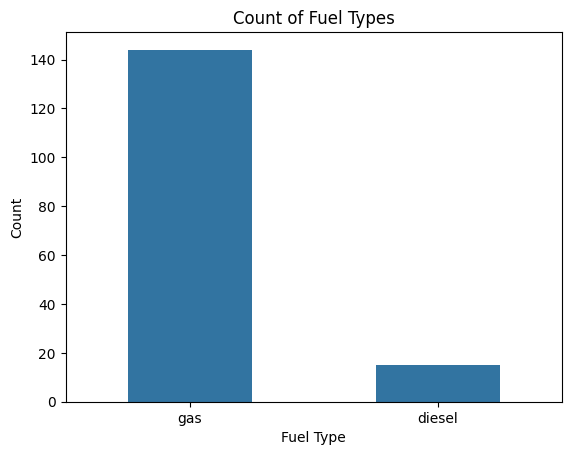

In [ ]:
# Import Seaborn Library
import seaborn as sns

# Plot the chart
sns.countplot(data=automobile_data, x='fuel-type', width=0.5)

# Add labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count of Fuel Types')

# Display the chart
plt.show()

*   What : 1 Categorical Attribute (Fuel Type)
*   How : Count is expressed with line marks aligned in a vertical position, fuel is separated with horizontal position.
*   Why : Lookup and compare which fuel type is more common in the dataset.

### Findings:
*   Gas is more commonly used than diesel.